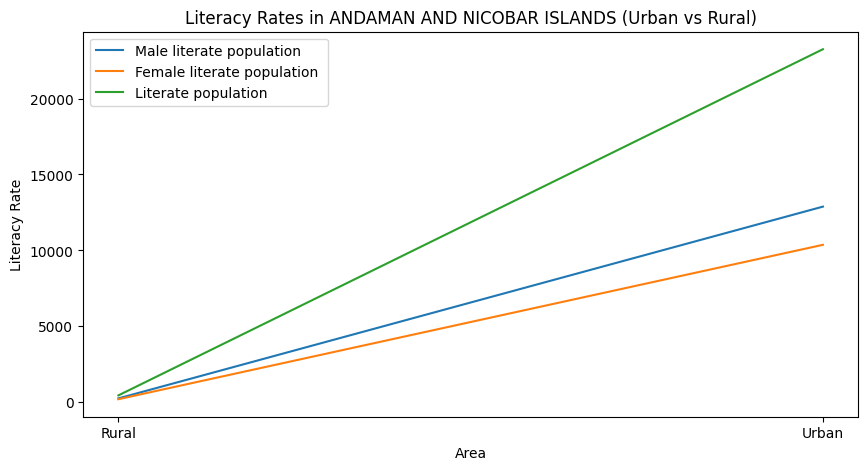

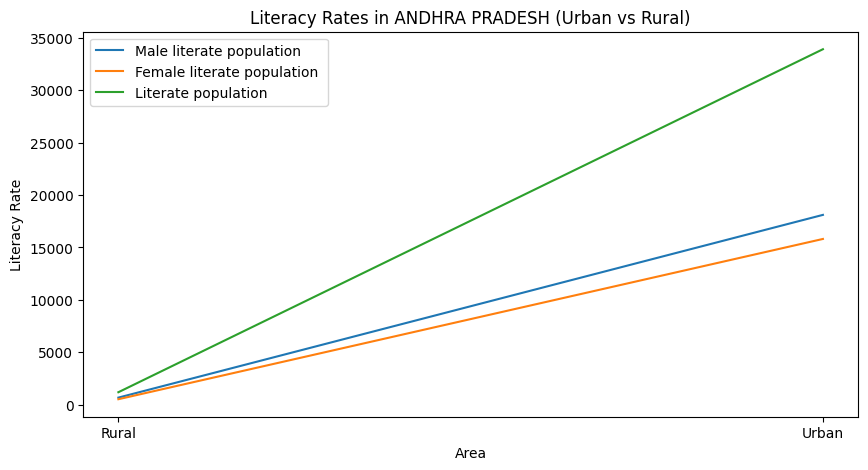

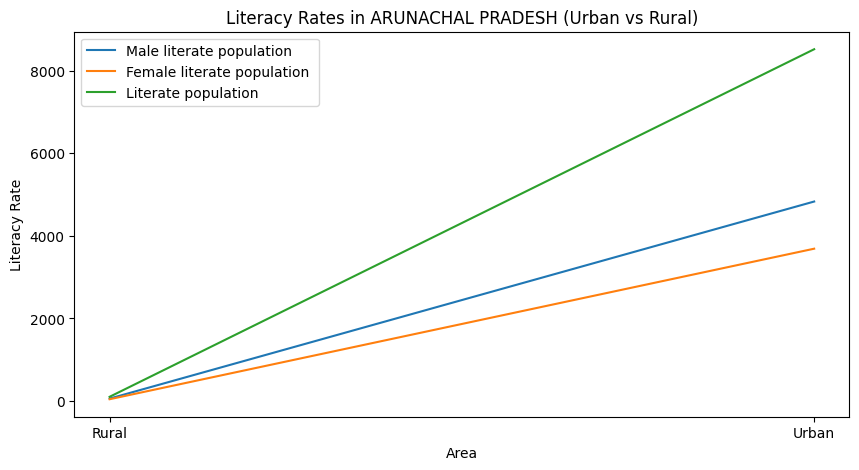

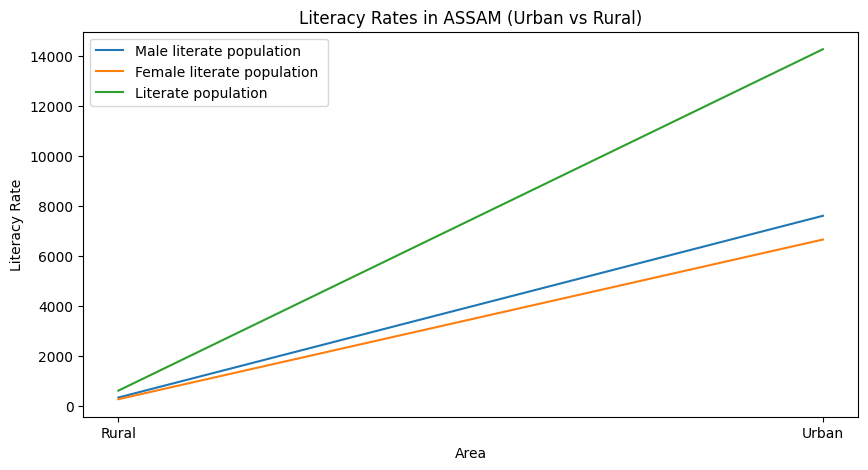

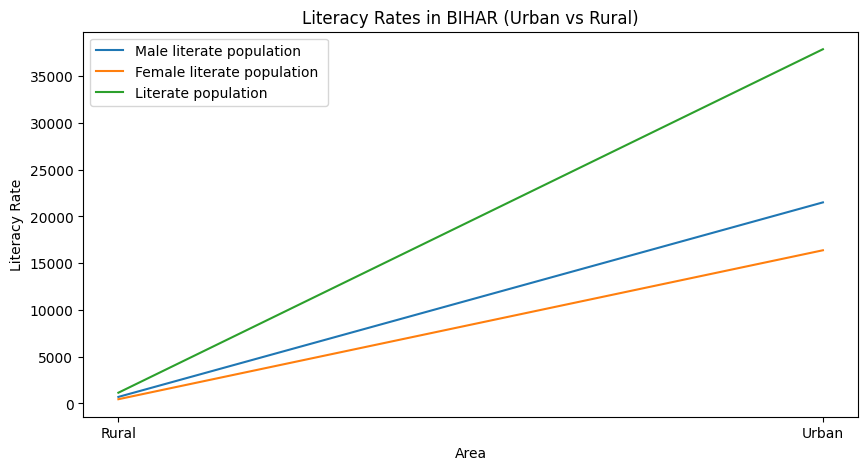

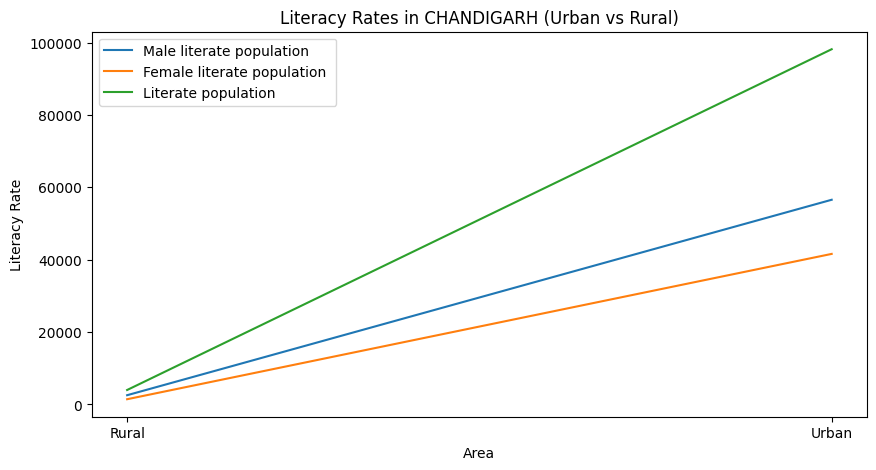

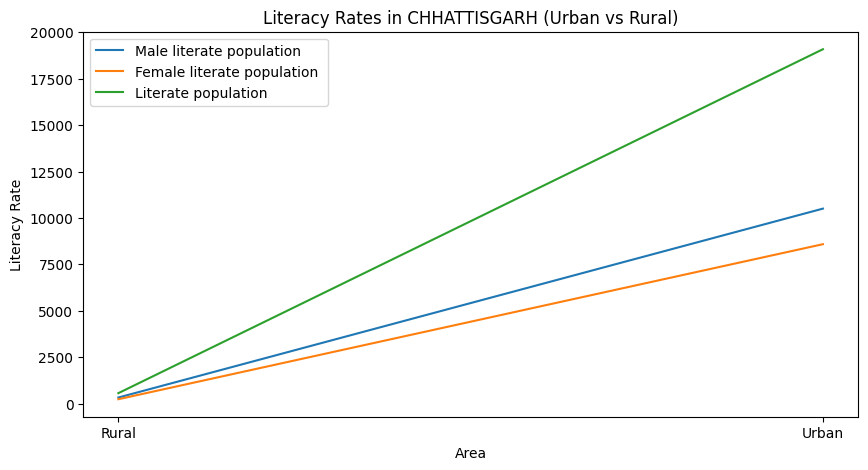

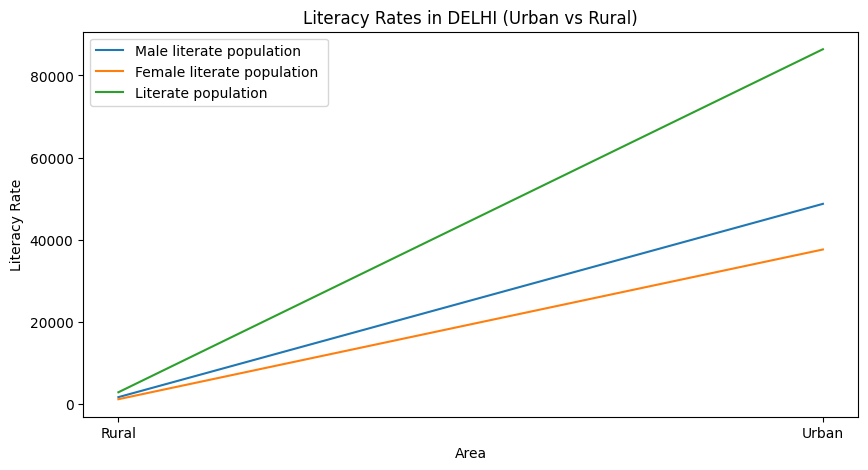

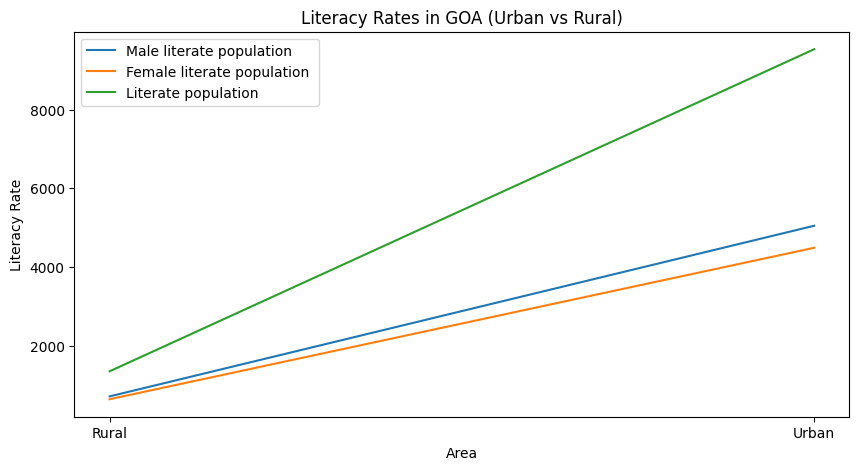

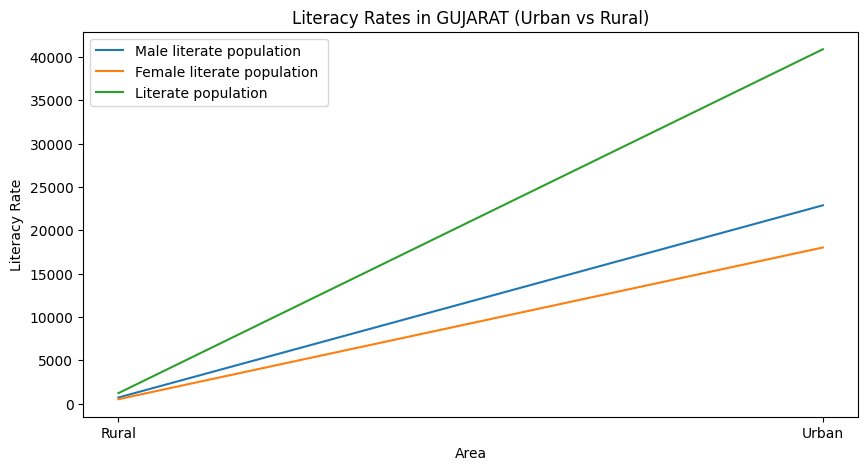

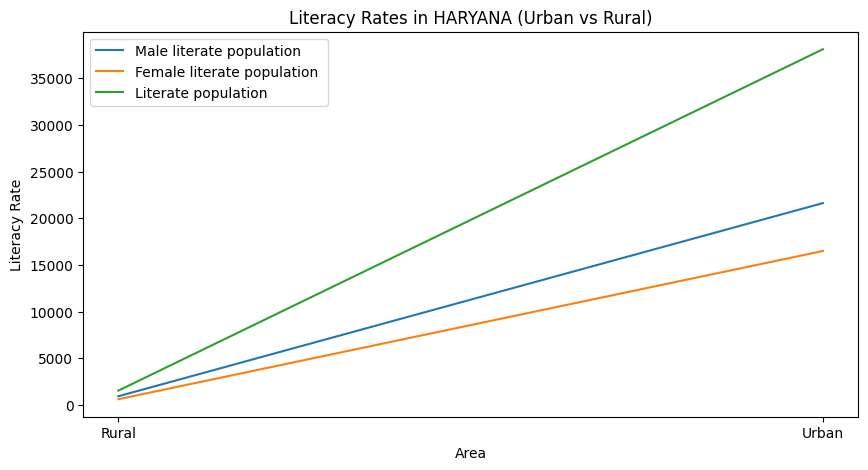

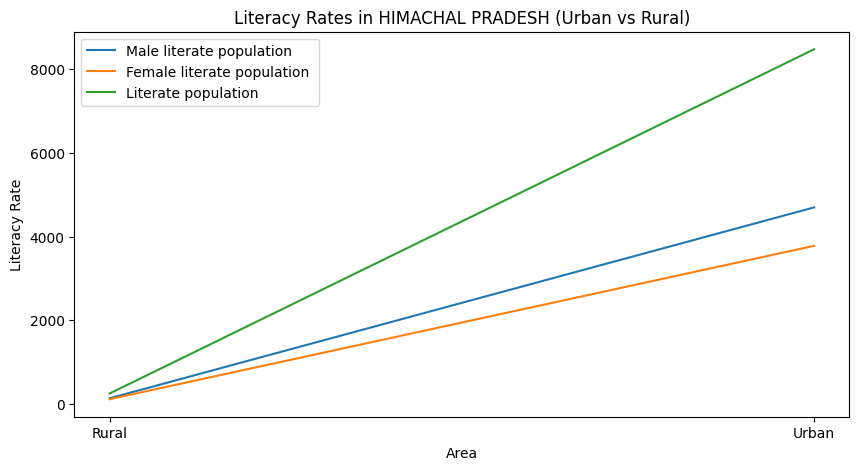

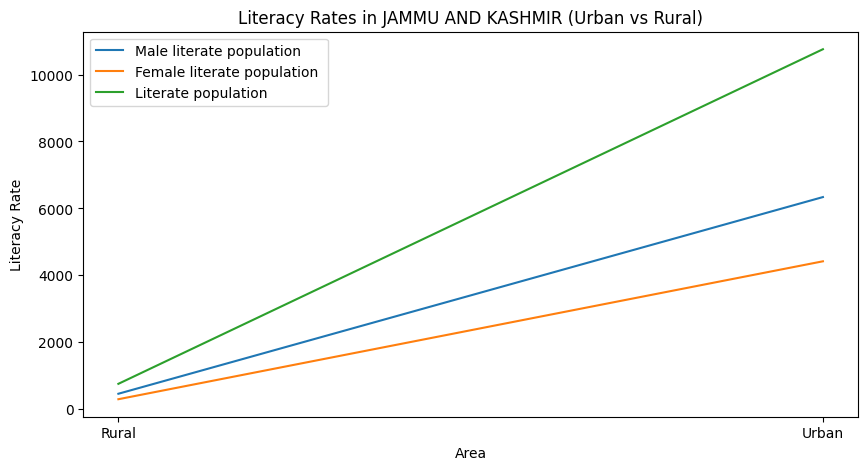

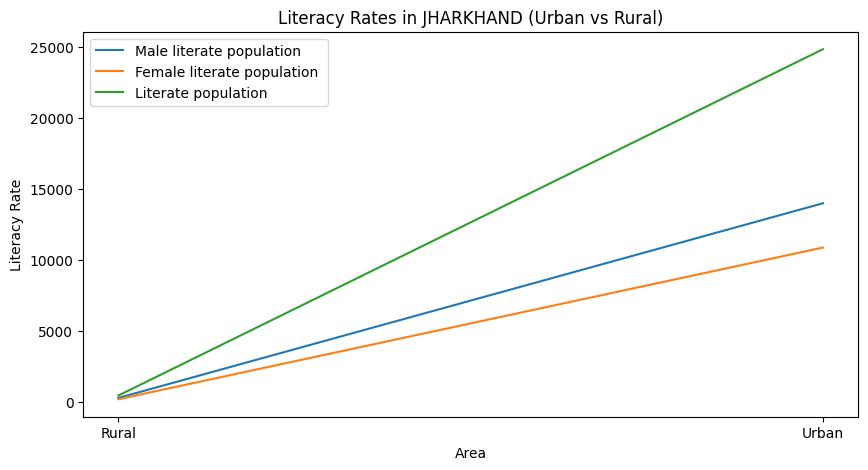

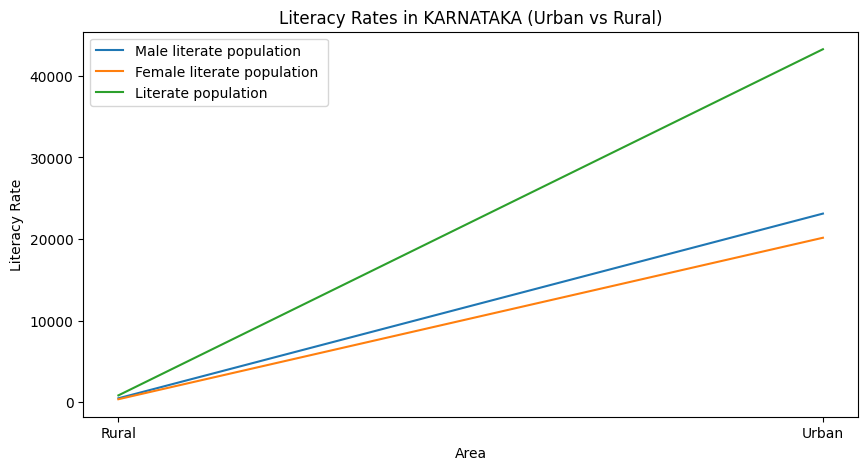

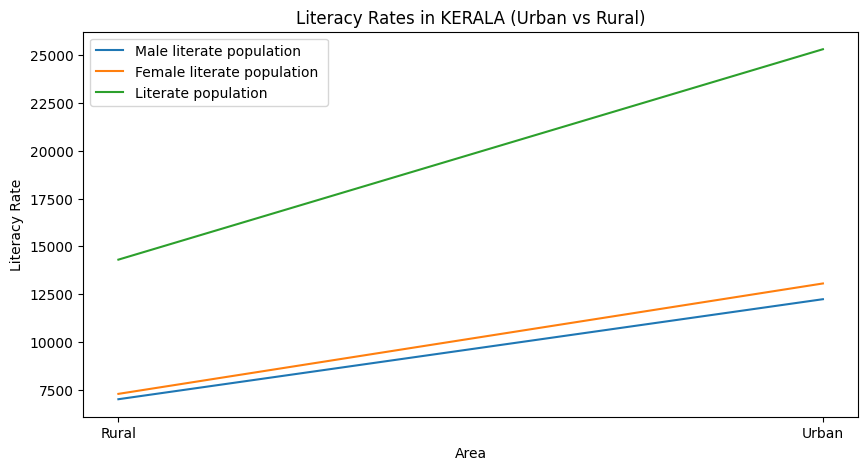

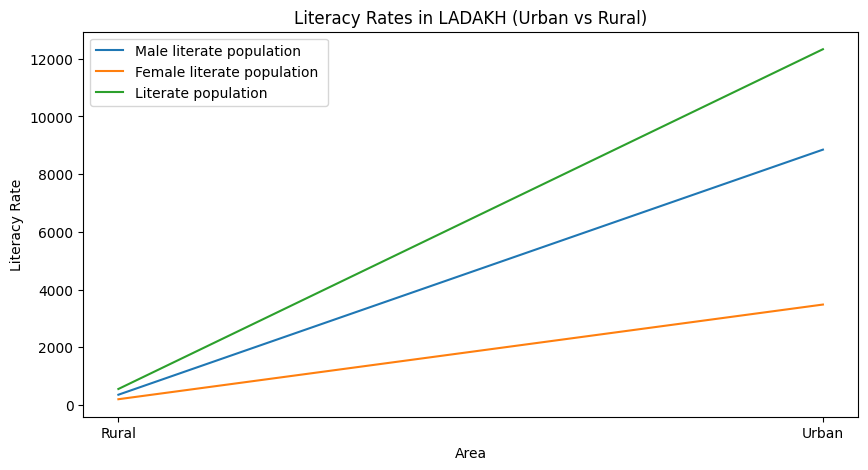

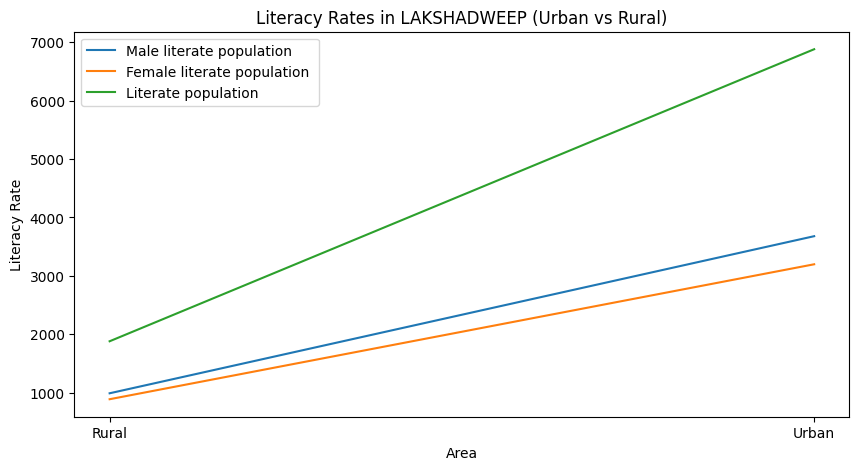

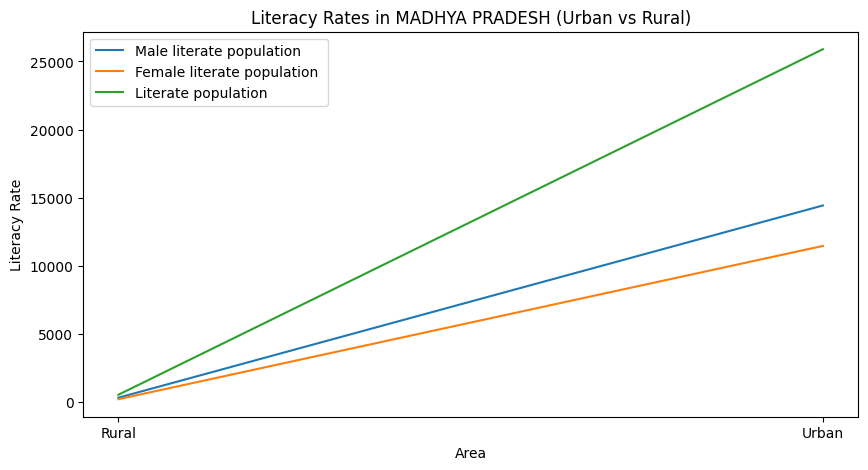

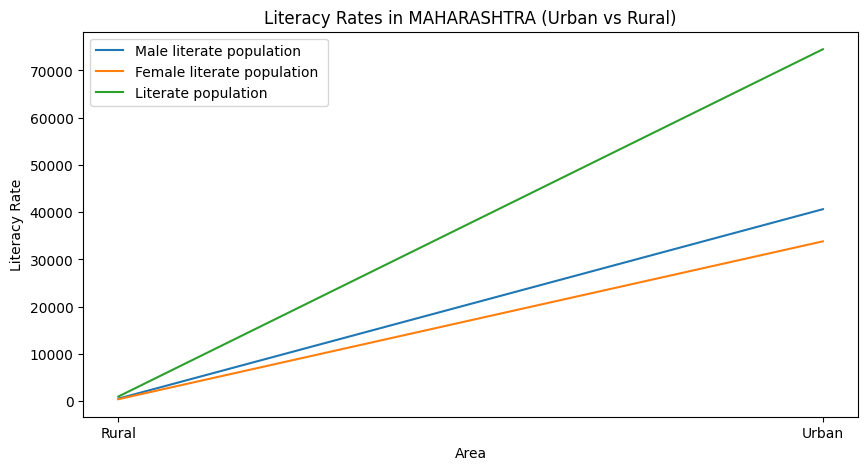

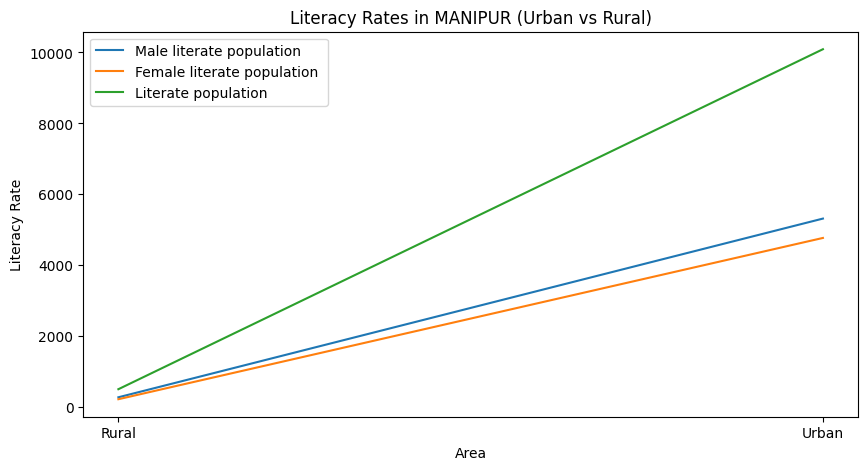

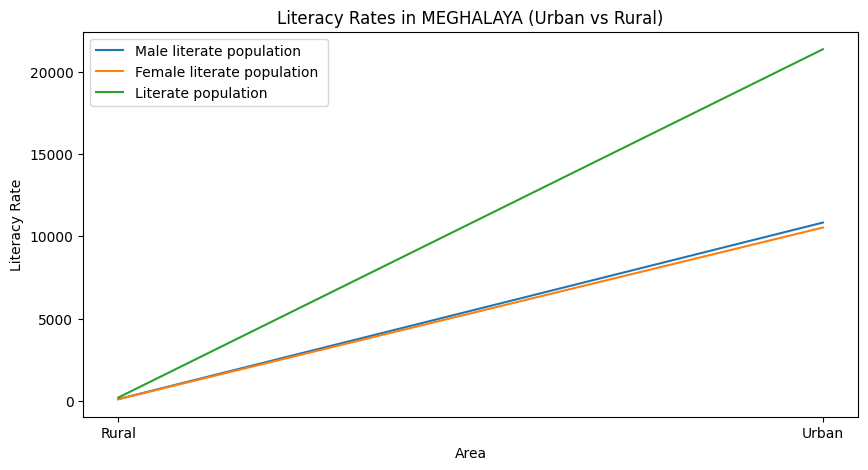

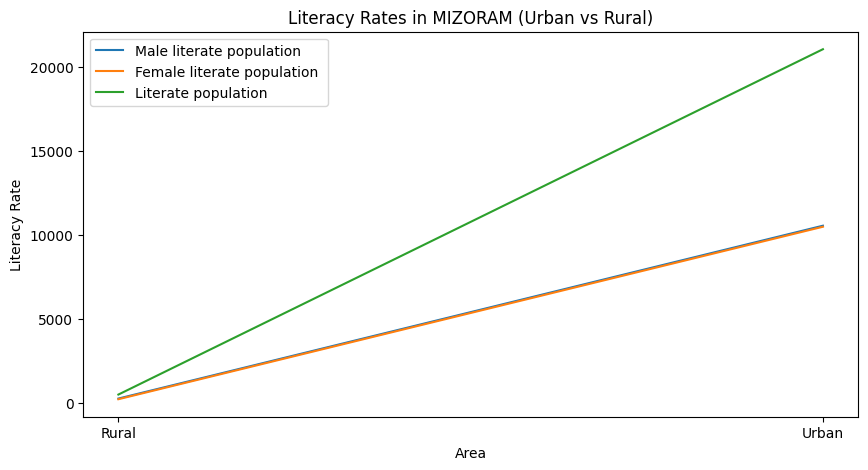

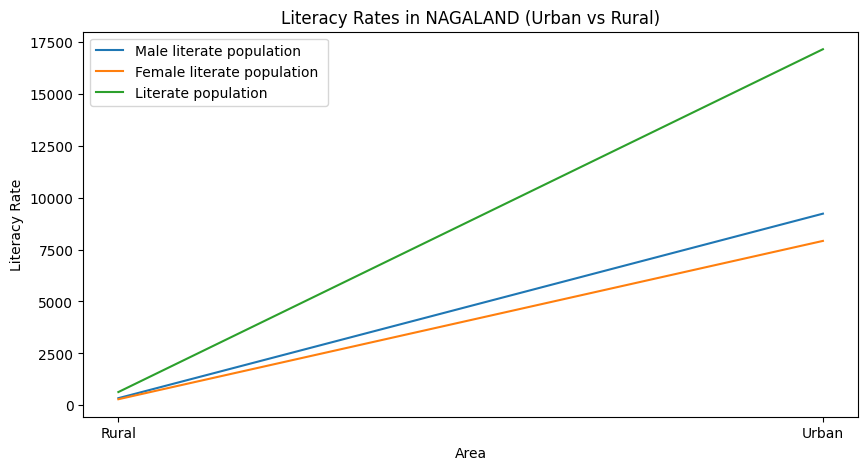

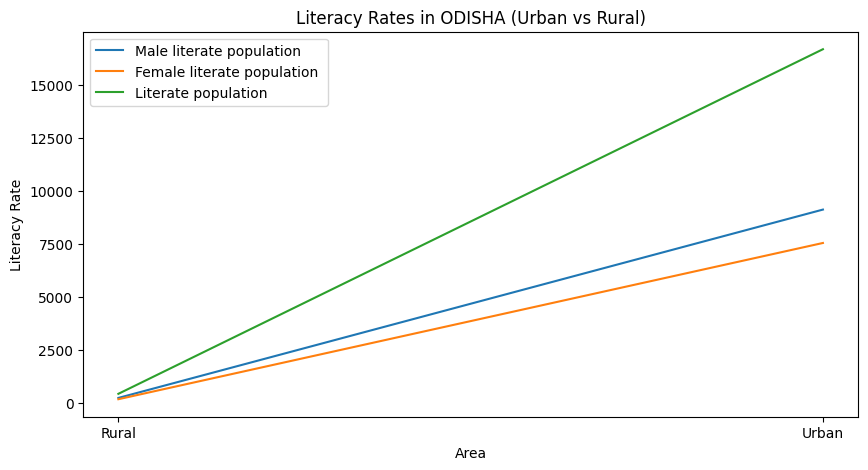

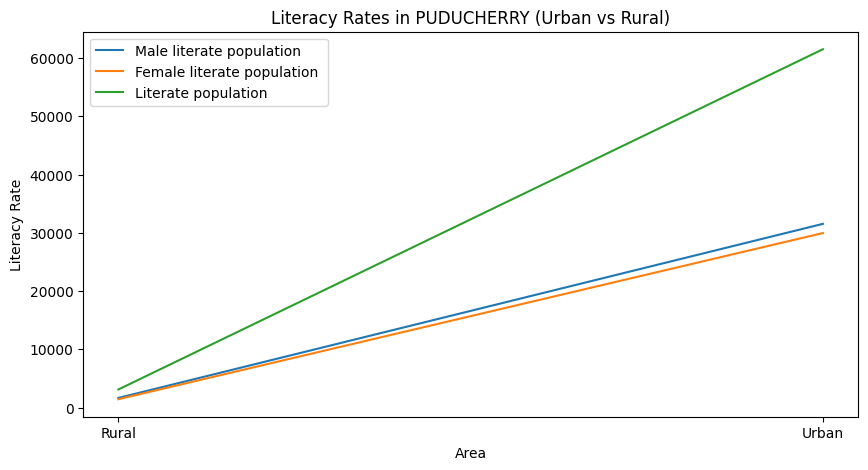

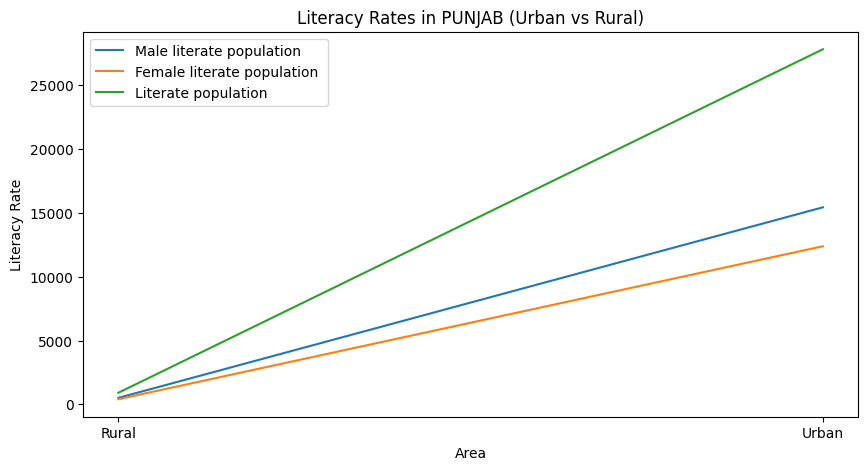

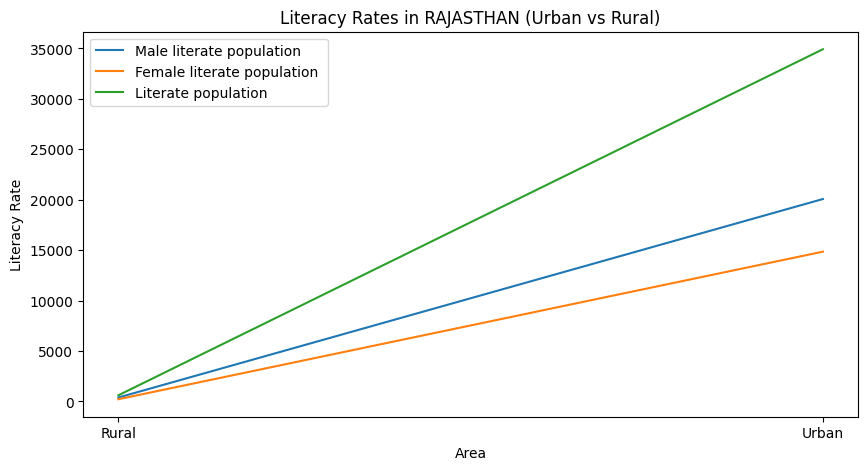

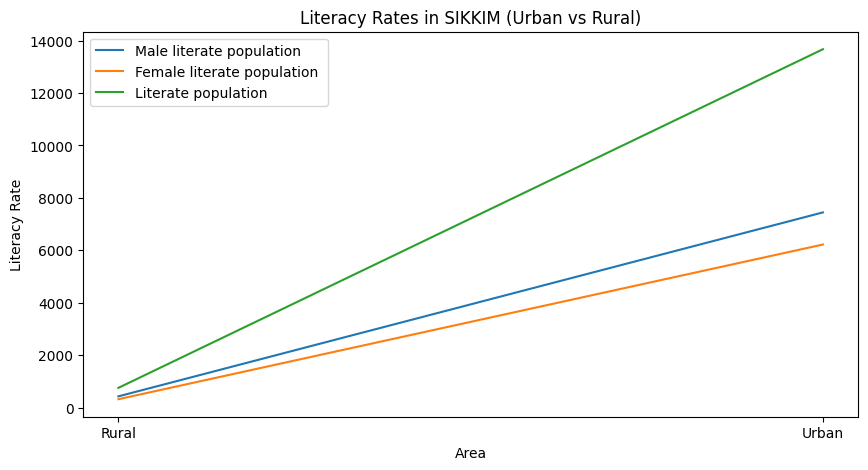

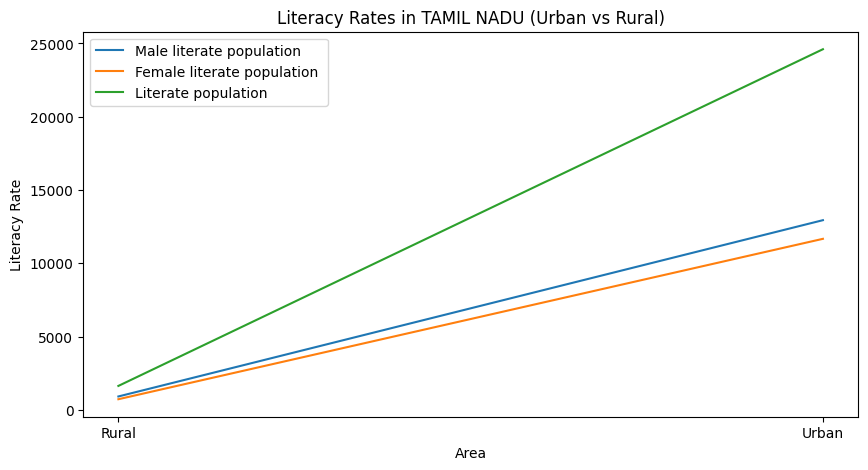

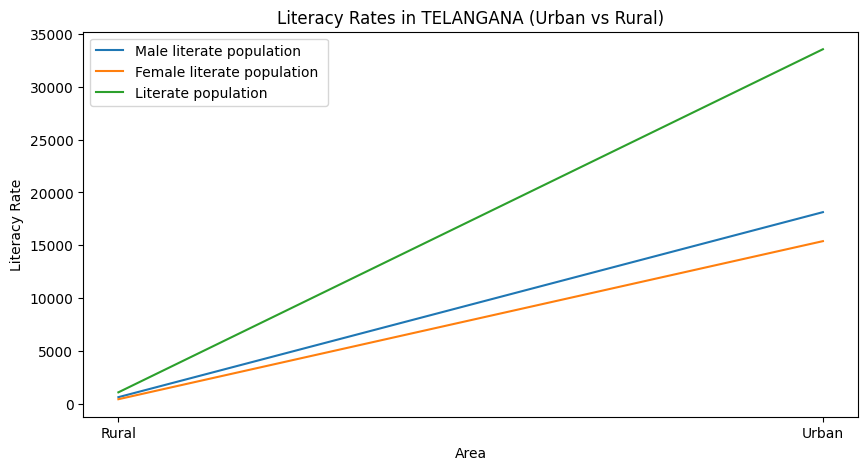

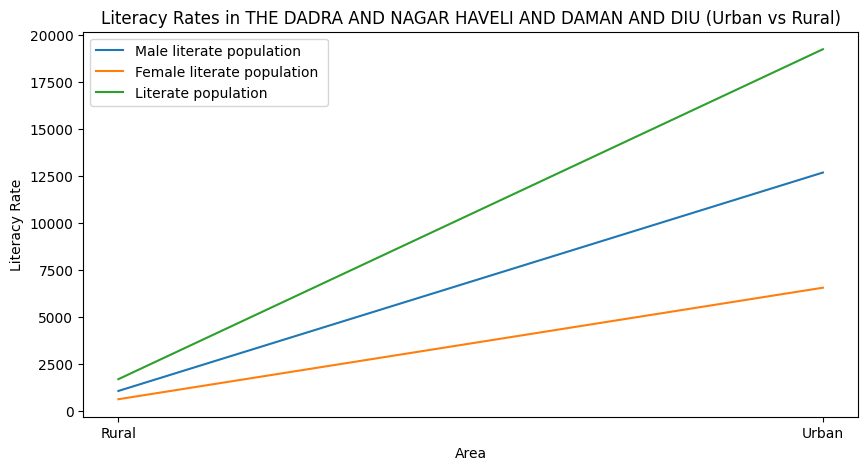

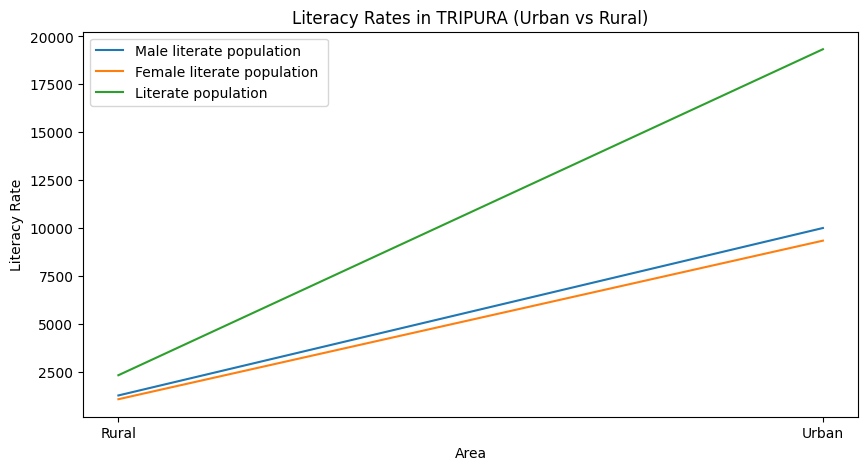

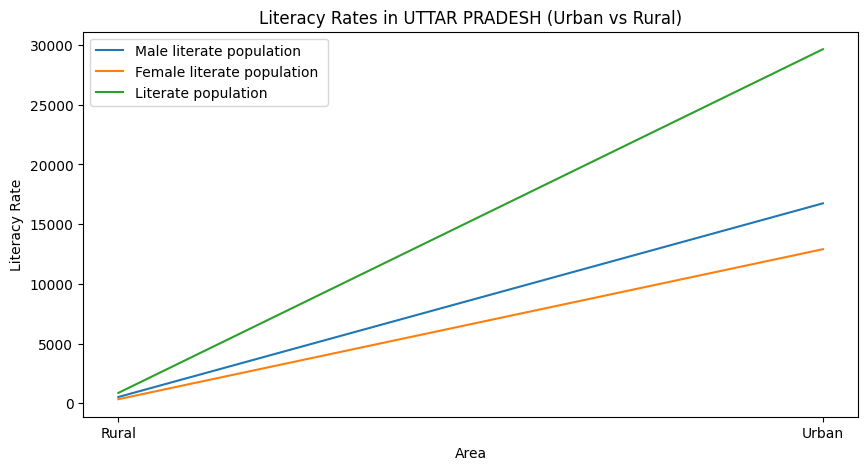

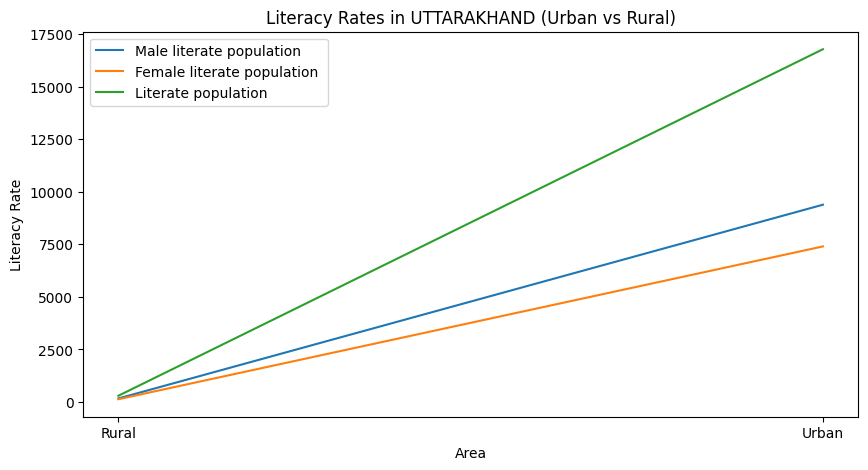

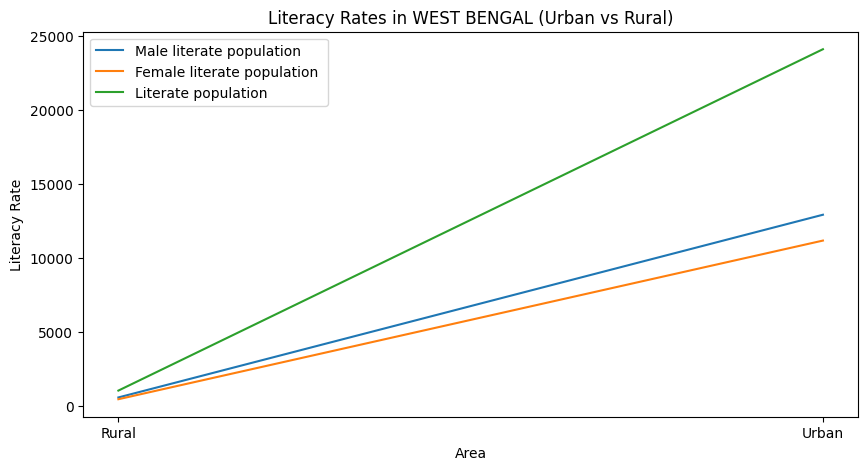

The state with the highest disparity between urban and rural literacy rates is CHANDIGARH.


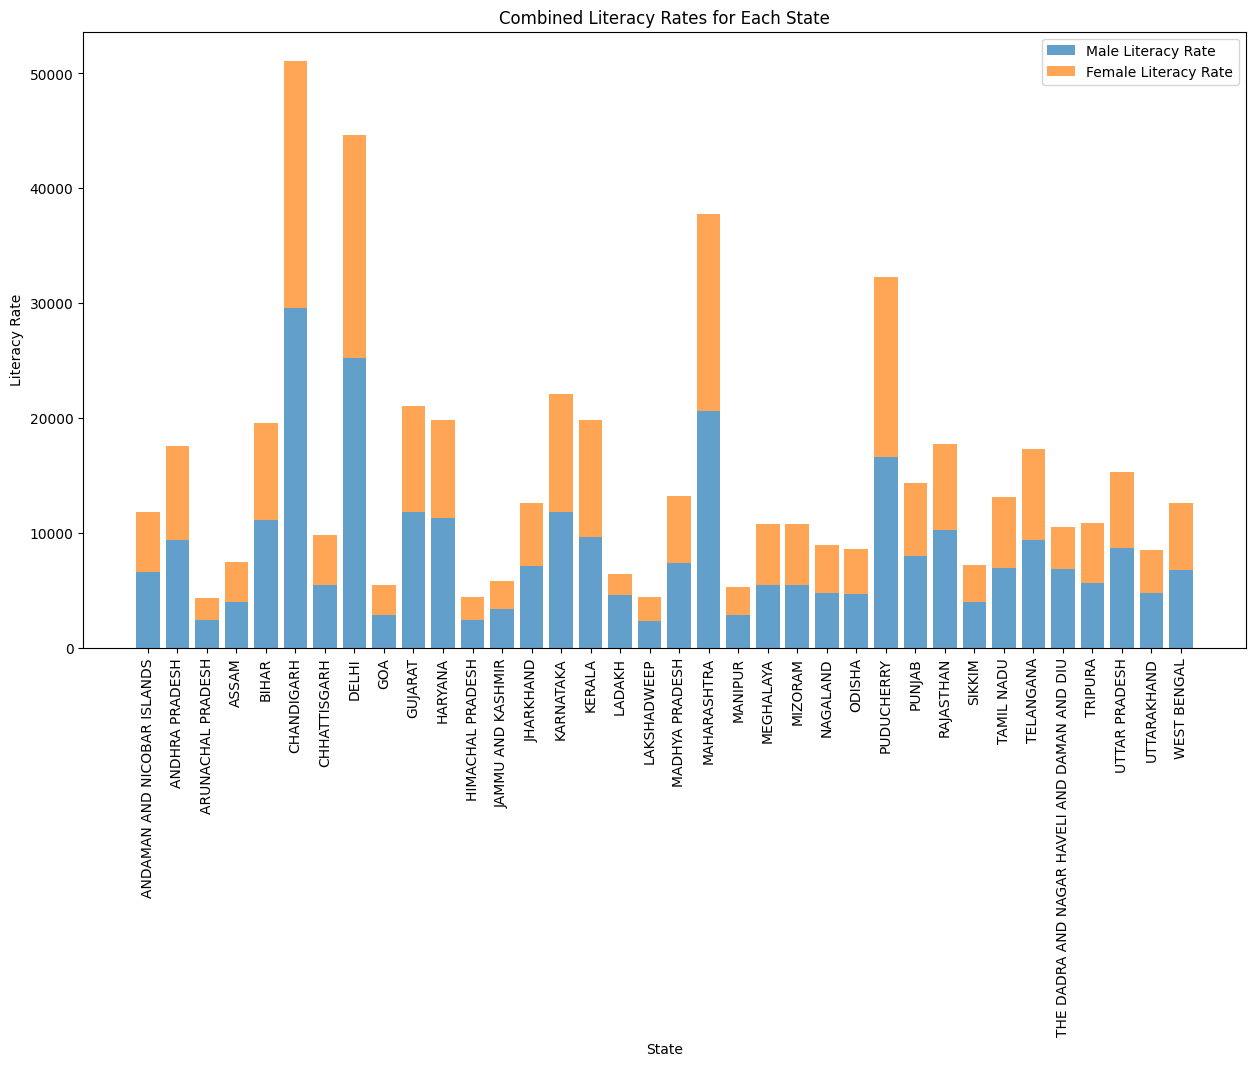

In [6]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('NDAP_REPORT_6000.csv')



data.dropna(inplace=True)



grouped = data.groupby(['State', 'Rural or Urban'])

# Calculate mean literacy rates for males, females, and total population
literacy_rates = grouped[['Male literate population', 'Female literate population ', 'Literate population ']].mean().reset_index()

# Plot literacy rates for males, females, and total population in urban and rural areas within each state
states = literacy_rates['State'].unique()
for state in states:
    state_data = literacy_rates[literacy_rates['State'] == state]
    plt.figure(figsize=(10, 5))
    plt.plot(state_data['Rural or Urban'], state_data['Male literate population'], label='Male literate population')
    plt.plot(state_data['Rural or Urban'], state_data['Female literate population '], label='Female literate population ')
    plt.plot(state_data['Rural or Urban'], state_data['Literate population '], label='Literate population ')
    plt.title(f'Literacy Rates in {state} (Urban vs Rural)')
    plt.xlabel('Area')
    plt.ylabel('Literacy Rate')
    plt.legend()
    plt.show()

# Identify the state with the highest disparity between urban and rural areas
literacy_rates['Disparity'] = literacy_rates.groupby('State')['Literate population '].transform(lambda x: x.max() - x.min())
max_disparity_state = literacy_rates.loc[literacy_rates['Disparity'].idxmax()]['State']
print(f'The state with the highest disparity between urban and rural literacy rates is {max_disparity_state}.')

# Plot combined literacy rates for males and females in each state
combined_literacy = literacy_rates.groupby('State')[['Male literate population', 'Female literate population ']].mean().reset_index()

plt.figure(figsize=(15, 8))
plt.bar(combined_literacy['State'], combined_literacy['Male literate population'], label='Male Literacy Rate', alpha=0.7)
plt.bar(combined_literacy['State'], combined_literacy['Female literate population '], label='Female Literacy Rate', alpha=0.7, bottom=combined_literacy['Male literate population'])
plt.title('Combined Literacy Rates for Each State')
plt.xlabel('State')
plt.ylabel('Literacy Rate')
plt.xticks(rotation=90)
plt.legend()
plt.show()



